In [1]:
import pandas as pd
df= pd.read_csv("NEW_Keywords_social.csv")
df

,index,selftext,num_comments,score,title,type
0,42,Nothing has been enough to leave a scar and mo...,7,1,"I need help when I'm eighteen (""running away"")",Adult
1,55,"Apparently, when people actually do have a his...",1,5,Failure at Adulting,Adult
2,60,"Stress, depression, anxiety, social isolation?",4,9,I'm starting a mental health/adulting blog!,Adult
3,67,What jobs: these are going to be mostly custom...,2,9,Finding Work From Home Jobs,Adult
4,154,"I don't have a big family, and so socializing ...",4,7,Feeling super lost,Adult
...,...,...,...,...,...,...
1077,5887,It's not like I've lived under a rock for the ...,1,1,This is how I'd describe my quarter-life crisi...,Adult
1078,5894,I am a student at the University of Washington...,0,1,Voting Patterns Among Young Adults,Adult
1079,5906,I don't want to look at social media anymore.,13,1,Free time activity,Adult
1080,5940,And for a lot of us continuing into our fall s...,0,1,Everyone has their own weird college stories a...,Adult


In [2]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [3]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [4]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0       Nothing ha been enough to leave a scar and mos...
1       Apparently, when people actually do have a his...
2          Stress, depression, anxiety, social isolation?
3       What jobs: these are going to be mostly custom...
4       I don't have a big family, and so socializing ...
                              ...                        
1077    It's not like I've lived under a rock for the ...
1078    I am a student at the University of Washington...
1079       I don't want to look at social medium anymore.
1080    And for a lot of u continuing into our fall se...
1081    This doesn't exactly seem like the most active...
Name: selftext, Length: 1082, dtype: object

In [5]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,Nothing ha been enough to leave a scar and mos...
1,1,"Apparently, when people actually do have a his..."
2,2,"Stress, depression, anxiety, social isolation?"
3,3,What jobs: these are going to be mostly custom...
4,4,"I don't have a big family, and so socializing ..."
...,...,...
1077,1077,It's not like I've lived under a rock for the ...
1078,1078,I am a student at the University of Washington...
1079,1079,I don't want to look at social medium anymore.
1080,1080,And for a lot of u continuing into our fall se...


In [6]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,10,401k,able,account,actually,address,adult,advice,age,...,work,worked,worker,working,world,wrong,x200b,year,years,youtube
0,0.0,0.0,0.0,0.176352,0.151428,0.199619,0.0,0.187912,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.476023,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.413946,0.0
1078,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0
1079,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0
1080,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.30196,0.0,0.369043,0.000000,0.0


In [7]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=3, random_state=0)

In [8]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [9]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),})
topic1

,Topic 0,Topic 1,Topic 2
0,ha,im,instagram
1,pension,wa,facebook
2,card,just,stock
3,tax,social life,phone
4,income,like,ha
5,security number,people,post
6,number,media,time
7,social,social media,social
8,security,life,social medium
9,social security,social,medium


In [10]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]
t1

,index,text,topic
2,2,"Stress, depression, anxiety, social isolation?",1
3,3,What jobs: these are going to be mostly custom...,1
4,4,"I don't have a big family, and so socializing ...",1
7,7,(if washable): 6+ weeksI know this will change...,1
8,8,In school people joke about having to chose be...,1
...,...,...,...
1074,1074,I have paralyzing anxiety and 0 social skills.,1
1077,1077,It's not like I've lived under a rock for the ...,1
1078,1078,I am a student at the University of Washington...,1
1080,1080,And for a lot of u continuing into our fall se...,1


## Compare Emotion across topics

In [11]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [12]:
a=sent_df(t0)

a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2
a

C:\Users\ymf\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\ymf\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\ymf\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc.

,neg,neu,pos,compound,text,p_word_dict,n_word_dict,total,p_word,n_word,label,topic
0,0.028,0.929,0.043,0.1275,I've been trying to set up a saving account in...,"{'security': 1.4, 'important': 0.8}",{'trust': -1.702},0.016146,security important,trust,1,0
1,0.119,0.678,0.203,0.2500,Her social security back pay just came in at 12k.,{'security': 1.4},{'pay': -0.4},0.123894,security,pay,1,0
2,0.000,0.869,0.131,0.8360,I went in today to do the new hire paperwork a...,"{'security': 1.4, 'number': 0.3}",{},0.150748,security number,,1,0
3,0.071,0.844,0.084,-0.1091,I mixed up the first and last digit of my soci...,"{'security': 1.4, 'number': 0.3}",{'error': -2.125},0.015403,security number,error,1,0
4,0.039,0.850,0.111,0.4939,I just turned 18 and come to find out that thr...,"{'growing': 0.7, 'security': 1.4}",{'lost': -1.3},0.084706,growing security,lost,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.045,0.907,0.047,0.0258,Apologies if this is in the incorrect subreddi...,{'security': 1.4},{'lost': -1.3},0.002205,security,lost,1,0
285,0.286,0.714,0.000,-0.3818,"Understand what social location is, then pay n...",{},"{'pay': -0.4, 'no': -1.2}",-0.400560,,pay no,-1,0
286,0.000,0.614,0.386,0.9432,Literally.It's easier for me to learn with a r...,"{'easier': 1.8, 'kind': 2.4, 'honour': 2.7, 's...",{},0.628664,easier kind honour security number,,1,0
287,0.450,0.550,0.000,-0.8402,"""I should have socialized, done dumb shit, too...",{},"{'dumb': -2.3, 'shit': -2.6, 'risks': -1.1}",-0.818182,,dumb shit risks,-1,0


In [13]:
final=pd.concat([a,b,c],axis=0)
final

,neg,neu,pos,compound,text,p_word_dict,n_word_dict,total,p_word,n_word,label,topic
0,0.028,0.929,0.043,0.1275,I've been trying to set up a saving account in...,"{'security': 1.4, 'important': 0.8}",{'trust': -1.702},0.016146,security important,trust,1,0
1,0.119,0.678,0.203,0.2500,Her social security back pay just came in at 12k.,{'security': 1.4},{'pay': -0.4},0.123894,security,pay,1,0
2,0.000,0.869,0.131,0.8360,I went in today to do the new hire paperwork a...,"{'security': 1.4, 'number': 0.3}",{},0.150748,security number,,1,0
3,0.071,0.844,0.084,-0.1091,I mixed up the first and last digit of my soci...,"{'security': 1.4, 'number': 0.3}",{'error': -2.125},0.015403,security number,error,1,0
4,0.039,0.850,0.111,0.4939,I just turned 18 and come to find out that thr...,"{'growing': 0.7, 'security': 1.4}",{'lost': -1.3},0.084706,growing security,lost,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.078,0.843,0.078,0.0000,I am looking for a social medium page/group wh...,{'support': 1.7},{'problem': -1.7},0.000000,support,problem,0,2
187,0.165,0.602,0.233,0.2263,I distract myself with social medium and YouTu...,{'friends': 2.1},{'distract': -1.2},0.112957,friends,distract,1,2
188,0.059,0.941,0.000,-0.0516,Idk if any of y'all are into social medium but...,{},{'Idk': -0.2},-0.062699,,Idk,-1,2
189,0.067,0.829,0.104,0.6032,"Everything, from building contracting to food ...","{'entertainment': 1.8, 'ha': 1.4, 'good': 1.9,...","{'cheat': -2.0, 'bother': -1.6637}",0.044632,entertainment ha good powerful,cheat bother,1,2


In [14]:
final['text']=final['text'].str.lower()

def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

final['text']= final['text'].str.split().apply(lambda x: lemmatize(x))

In [15]:
import itertools
import collections

In [16]:
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(final['text'])

,words,count
0,social,1136
1,security,269
2,medium,209
3,wa,182
4,like,173
...,...,...
95,problem,27
96,another,27
97,come,26
98,security.,26


In [17]:
import itertools
import collections

spec_chars = ["!",'“','"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    final['text'] = final['text'].str.replace(char, ' ')
    final['text'] = final['text'].str.split().str.join(" ")
    
stop_words.update({"i'm",'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','need','etc','got','always',
                   'know','want','thing','really','dont',
                   'feel','find','even','go','would','well','wa','im'
                  })
final['text']=final['text'].apply(lambda x: remove_stopwords(x))

count_words(final['text'][final['topic']==0]).head(10)

,words,count
0,social,361
1,security,334
2,number,86
3,tax,65
4,income,59
5,card,56
6,year,47
7,account,44
8,ha,41
9,retirement,38


In [18]:
def emo(tokens):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    emotion_words=list(D.keys())
    
    List=list(itertools.chain(*tokens))
    
    result = []
    
    for word in List:
        if word in emotion_words:
            result.append(word)
    
    return result

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(wordlst):
    text = ' '.join (map(str, wordlst))

    wordcloud = WordCloud(width=1000, height=1000, margin=0,background_color='white',collocations=False).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [19]:
count_words(final['text'][final['topic']==1]).head(10)

,words,count
0,social,614
1,life,144
2,people,125
3,socially,86
4,media,77
5,work,76
6,time,72
7,friend,67
8,year,64
9,anxiety,63


In [20]:
count_words(final['text'][final['topic']==2]).head(10)

,words,count
0,social,232
1,medium,199
2,people,34
3,time,32
4,ha,30
5,facebook,30
6,account,23
7,year,19
8,app,18
9,make,17


In [21]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    esBigrams = ngrams(all_words, 2)
    counts = collections.Counter(esBigrams)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in counts_df.words]
    counts_df.words=dictionary2

    return counts_df


In [22]:
count_2gram(final['text'][final['topic']==0]).head(10)


,words,count
0,social security,333
1,security number,65
2,security card,36
3,birth certificate,16
4,security benefit,13
5,bank account,11
6,pension social,11
7,name social,9
8,security medicare,9
9,certificate social,8


In [23]:
count_2gram(final['text'][final['topic']==1]).head(10)

,words,count
0,social life,79
1,social media,77
2,social anxiety,48
3,social distancing,23
4,social interaction,19
5,social skill,14
6,social circle,13
7,high school,12
8,social skills,11
9,social group,10


In [24]:
count_2gram(final['text'][final['topic']==2]).head(10)

,words,count
0,social medium,198
1,social media,11
2,medium account,8
3,post social,7
4,e commerce,7
5,medium platform,6
6,lot people,6
7,people social,5
8,something related,4
9,time spend,4


[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

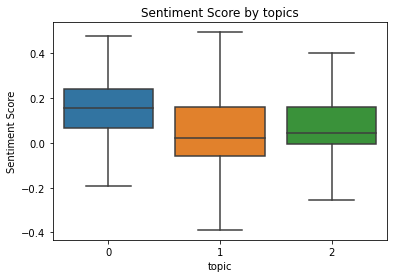

In [25]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Most common positive/negative words

In [26]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [27]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [28]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:20],count_words(negative)[:20]])
p_n

,words,count
0,security,231
1,like,104
2,ha,91
3,number,65
4,friend,55
5,good,48
6,want,34
7,help,30
8,benefit,24
9,credit,22


In [29]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,security,229
1,number,59
2,ha,31
3,like,17
4,benefit,17
0,pay,6
1,no,6
2,security,4
3,want,3
4,unemployment,3


In [30]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,68
1,friend,40
2,ha,39
3,good,32
4,help,19
0,anxiety,38
1,no,22
2,bad,15
3,awkward,10
4,problem,10


In [31]:
positive,negative=sort_pn(c)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,ha,21
1,like,19
2,friend,13
3,good,12
4,want,8
0,no,5
1,struggling,3
2,teasing,3
3,want,3
4,blocked,2


## Word Frequency splitted by sentiment

In [32]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [33]:
final

,neg,neu,pos,compound,text,p_word_dict,n_word_dict,total,p_word,n_word,label,topic
0,0.028,0.929,0.043,0.1275,trying set saving account secret parent access...,"{'security': 1.4, 'important': 0.8}",{'trust': -1.702},0.016146,security important,trust,1,0
1,0.119,0.678,0.203,0.2500,social security back pay came 12k,{'security': 1.4},{'pay': -0.4},0.123894,security,pay,1,0
2,0.000,0.869,0.131,0.8360,went today new hire paperwork told tomorrow br...,"{'security': 1.4, 'number': 0.3}",{},0.150748,security number,,1,0
3,0.071,0.844,0.084,-0.1091,mixed first last digit social security number ...,"{'security': 1.4, 'number': 0.3}",{'error': -2.125},0.015403,security number,error,1,0
4,0.039,0.850,0.111,0.4939,turned 18 come year growing parent lost track ...,"{'growing': 0.7, 'security': 1.4}",{'lost': -1.3},0.084706,growing security,lost,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.078,0.843,0.078,0.0000,looking social medium page group young adult 2...,{'support': 1.7},{'problem': -1.7},0.000000,support,problem,0,2
187,0.165,0.602,0.233,0.2263,distract social medium youtube friends,{'friends': 2.1},{'distract': -1.2},0.112957,friends,distract,1,2
188,0.059,0.941,0.000,-0.0516,idk social medium follow instagram josiah boyle,{},{'Idk': -0.2},-0.062699,,Idk,-1,2
189,0.067,0.829,0.104,0.6032,everything building contracting food preparati...,"{'entertainment': 1.8, 'ha': 1.4, 'good': 1.9,...","{'cheat': -2.0, 'bother': -1.6637}",0.044632,entertainment ha good powerful,cheat bother,1,2


In [34]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.121076]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.000268]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(               words  count
 0    social security    305
 1      social medium    123
 2    security number     61
 3       social media     52
 4        social life     45
 5      security card     31
 6   security benefit     14
 7  birth certificate     13
 8     social anxiety     12
 9     pension social     11,
                 words  count
 0       social medium     50
 1      social anxiety     35
 2     social security     30
 3         social life     27
 4        social media     20
 5          people try      8
 6   social distancing      8
 7  social interaction      8
 8         life social      6
 9      anxiety social      6)

In [35]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(                words  count
 0     social security    303
 1     security number     61
 2       security card     31
 3   birth certificate     13
 4    security benefit     13
 5      pension social     11
 6         name social      8
 7        bank account      8
 8   security benefits      8
 9  certificate social      6,
                 words  count
 0     social security     30
 1       security card      5
 2     security number      4
 3   birth certificate      3
 4   security medicare      3
 5         going start      2
 6  certificate social      2
 7      called company      2
 8    return garnished      2
 9           gross pay      2)

In [36]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(                  words  count
 0           social life     45
 1          social media     41
 2        social anxiety     12
 3     social distancing     10
 4         social circle     10
 5          social event      9
 6    social interaction      9
 7  socially responsible      9
 8          social group      8
 9           high school      7,
                 words  count
 0      social anxiety     35
 1         social life     27
 2        social media     20
 3   social distancing      8
 4  social interaction      8
 5          people try      7
 6      anxiety social      6
 7    social isolation      6
 8          bad social      6
 9        social skill      6)

In [37]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(               words  count
 0      social medium    118
 1       social media     11
 2     medium account      6
 3         time spend      4
 4         lot people      4
 5       found social      4
 6      people social      4
 7  something related      3
 8      related field      3
 9       spend social      3,
                words  count
 0      social medium     46
 1       sale running      3
 2     running social      3
 3   medium campaigns      3
 4  campaigns product      3
 5  product marketing      3
 6  marketing putting      3
 7       putting blog      3
 8          blog post      3
 9      post podcasts      3)

## Topic Modeling after sentiment splitting

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(2,3))
counts=vec.fit_transform(final['text'][final['label']>0.121076]) #positive
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,bank account,birth certificate,credit card,good social,ha social,high school,life social,lot people,pension social,pension social security,...,social life,social media,social medium,social network,social security,social security benefit,social security benefits,social security card,social security number,socially responsible
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.314330,0.0,0.0,0.671266,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.403876,0.0,0.0,0.646871,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.375455,0.0,0.0,0.000000,0.655375,0.0
4,0.0,0.765039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.202424,0.0,0.0,0.432285,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
671,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
672,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
673,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [39]:
from sklearn.decomposition import NMF

model1=NMF(n_components=2,init="random",random_state=1)
model1.fit(count_df1)

NMF(init='random', n_components=2, random_state=1)

In [40]:
#positive topics
topic2=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10)})
topic2
# 'Topic 4':top_words(count_df1, model1, 4, 10),
#                     'Topic 5':top_words(count_df1, model1, 5, 10)

,Topic 0,Topic 1
0,high school,birth certificate
1,good social,pension social
2,life social,pension social security
3,social network,security benefit
4,social circle,social security benefit
5,social interaction,social security card
6,lot people,security card
7,people social,social security number
8,social media,security number
9,social medium,social security


pay house/loan/car \
retirement \
credit card \
school friend feel

In [41]:
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(2,3))
counts=vec.fit_transform(final['text'][final['label']<-0.000268]) #negative
counts=counts.toarray()
count_df2=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df2

,address social,anti social,anxiety social,anxiety social anxiety,bad social,bad social anxiety,birth certificate,blog post,blog post podcasts,campaigns product,...,socially isolated,teasing new,teasing new product,terrible social,time job,time social,use social,working home,year ago,year old
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.493467,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.843924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.567357,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
model2=NMF(n_components=2,init="random",random_state=0)
model2.fit(count_df2)

NMF(init='random', n_components=2, random_state=0)

In [43]:
#negative topics
topic3=pd.DataFrame({'Topic 0':top_words(count_df2, model2, 0, 10),
                   'Topic 1':top_words(count_df2, model2, 1, 10)})
topic3

,Topic 0,Topic 1
0,anxiety social anxiety,ha social
1,anxiety social,making social
2,bad social anxiety,time social
3,bad social,people try
4,time job,use social
5,lack social,lot people
6,social media,post social
7,horrible social,long time
8,social anxiety,social media
9,social life,social medium


live home/parent \
credit card and insurance \
retirement \
parent talking

## Find all adj. related to parent

In [44]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
sentence=df['selftext'].apply(lambda x: sent_tokenize(x))

In [45]:
def extract_loan(sentence_ele):
    L=[]
    for i in sentence_ele:
        if 'loan' in i: 
            L.append(i)
    return L

In [46]:
loan_sentence=sentence.apply(lambda x: extract_loan(x))
' '.join(loan_sentence[0])

''

In [47]:
loan_sentence[0]

[]

In [48]:
import nltk
tokens=nltk.word_tokenize(loan_sentence[0][0])
print(tokens)

IndexError: list index out of range

In [ ]:
import nltk
nltk.pos_tag(tokens)

In [ ]:
#nltk.download('averaged_perceptron_tagger')
def extract_adj(sentence_ele):
    adjs=[]
    for i in sentence_ele:
        tokens=nltk.word_tokenize(i)
        df_type=pd.DataFrame(nltk.pos_tag(tokens),columns=['words', 'type'])
        adjs=list(df_type[df_type.type=='JJ'].words)
    return ' '.join(adjs)

In [ ]:
adjs=loan_sentence.apply(lambda x: extract_adj(x))

In [ ]:
adjs

In [ ]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(adjs).head(20)

In [ ]:
stop_words.update({'i','*','im','’','much'})
adjs=adjs.apply(lambda x: remove_stopwords(x))
count_df=count_words(adjs)
count_df.head(10)